<a href="https://colab.research.google.com/github/CodeTunisia/InformatiqueMathsSpe-2122/blob/main/td3/TD%203%20-%20Structures%20de%20donn%C3%A9es%20abstraites%20en%20python%20(corrig%C3%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Première partie : Applications - Piles
## Exercice 1 : Opérations élémentaires sur les piles

In [ ]:
# %load pile.py
def creer_pile():
    '''
    créér une pile
    '''
    return []
def empiler(p,x):
    '''
    ajouter une élément à la pile
    '''
    p.append(x)
def hauteur(p):
    '''
    Donner la taille de la pile
    '''
    return len(p)
def est_vide(p):
    '''
    tester si la pile est vide ou non
    '''
    return hauteur(p) == 0
def sommet(p):
    '''
    donner l'élément au sommet
    '''
    if est_vide(p):
        print("La pile est vide!")
    else:
        return p[-1]
def depiler(p):
    '''
    si n'est pas vide, faire sortir le dernier émlément de la pile
    '''
    if est_vide(p):
        print("La pile est vide!")
    else:
        return p.pop()
if __name__ == "__main__":
    p = creer_pile()
    print(hauteur(p))
    N = int(input("saisir un nombre d'éléments : "))
    for i in range(N):
        empiler(p, i)
    print(p)
    print(hauteur(p))
    for i in range(hauteur(p)):
        depiler(p)
    print(p)

0
saisir un nombre d'éléments : 4
[0, 1, 2, 3]
4
[]


## Exercice 2 : Manipulations simples de piles

In [1]:
# Puisque ce notebook s'éxécute en ligne :
# télécharger le module pile.py dans le répertoire courant
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td3/pile.py

--2021-10-07 21:30:06--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td3/pile.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 882 [text/plain]
Saving to: ‘pile.py’

pile.py             100%[===================>]     882  --.-KB/s    in 0s      

2021-10-07 21:30:06 (34.9 MB/s) - ‘pile.py’ saved [882/882]



In [2]:
from pile import *
#Q1/
def Max_Min(P):
    if not est_vide(P):
        Max=Min=sommet(P)
        posMax=posMin=hauteur(P)
    while not est_vide(P):
        s, h=sommet(P), hauteur(P)
        if s>Max:
            Max=s
            posMax= h
        elif s<Min:
            Min=s
            posMin= h
        depiler(P)
    return(Max,posMax),(Min,posMin)

In [3]:
import random as rd
L = [rd.randint(-50, 50) for _ in range(10)]
P = creer_pile()
for x in L:
    empiler(P, x)
print(P)

[10, 31, -12, 27, -17, 4, 13, -43, 29, 10]


In [ ]:
Max_Min(P)

((43, 2), (-31, 3))

In [ ]:
#Q2/
def reverse(P):
    P1=creer_pile()
    while not est_vide(P):
        empiler(P1, sommet(P))
        depiler(P)
    return P1

In [ ]:
P = creer_pile()
for x in L:
    empiler(P, x)
print(P)

[12, 43, -31, 0, 21, -11, 3, -19, 25, -29]


In [ ]:
reverse(P)

[-29, 25, -19, 3, -11, 21, 0, -31, 43, 12]

## Exercice 3 : Expression arithmétique postfixée

### Une méthode 
application sur les tableaux et les chaînes de carctaires.

In [ ]:
from pile import *
def evalpostfixe1(expr):
    p=creer_pile()
    for k in expr:
        print(k)
        if k!='+' and k!='-' and k!= '*':
            empiler(p,k)
        else :
            a=depiler(p)
            b=depiler(p)
            if k=='*':
                x=int(b)*int(a)
            if k=='+' :
                x=int(b)+int(a)
            if k=='-' :
                x=int(b)-int(a)
            empiler(p,x)
            print("p=",p,"x=",x)
    x=depiler(p)
    return(x)

In [ ]:
evalpostfixe1("234+-5*")

2
3
4
+
p= ['2', 7] x= 7
-
p= [-5] x= -5
5
*
p= [-25] x= -25


-25

In [ ]:
evalpostfixe1([1,2,'+',3,'*'])

1
2
+
p= [3] x= 3
3
*
p= [9] x= 9


9

### Une deuxième méthode 
Application sur les expressions de type chaînes de caractères et en utilisant la fonction prédéfinie [`eval`](https://docs.python.org/fr/3/library/functions.html#eval)

**Attention!**

In [ ]:
a = 8
eval("2.0 * a") # 2.0 --> réel

16.0

In [ ]:
eval("2 * a") # 2*a --> entier

16

In [ ]:
eval("2 * a > 0") # 2 * a > 0 --> Bool

True

In [ ]:
def evalpostfixe2(ch):
    p=creer_pile()
    for k in ch:
        if k.isdigit():
            empiler(p,k)
        else:
            a=depiler(p)
            b=depiler(p)
            print(b+k+a) # concatination de b, k et a!
            empiler(p,str(eval(b+k+a))) # l'elt à empiler doit être une chîne
    return(depiler(p))

In [ ]:
evalpostfixe2("12+46-*")


1+2
4-6
3*-2


'-6'

## Exercice 4 : Expression bien parenthésée

In [ ]:
from pile import *
def tester1(ch):
    p = creer_pile()
    for j in range(len(ch)):
        if ch[j]=='(':
            empiler(p, j)
        elif ch[j]==')':
            if est_vide(p):
                return ") à l'indice {} n'est pas ouverte !".format(j)
            else:
                i=depiler(p)
                couple = (i, j)
                print("Couple {} correct".format(couple))
    if est_vide(p):
        return 'Parenthésage OK'
    else:
        return "( à l'indice {} n'est pas refermée !".format(sommet(p))

In [ ]:
tester1("2+(3+b)*(5+(a-4))")

Couple (2, 6) correct
Couple (11, 15) correct
Couple (8, 16) correct


'Parenthésage OK'

In [ ]:
tester1("(a+8)*3)+4")

Couple (0, 4) correct


") à l'indice 7 n'est pas ouverte !"

In [ ]:
tester1("(b+8/5)+(4")

Couple (0, 6) correct


"( à l'indice 8 n'est pas refermée !"

# Deuxième partie Applications - File
## Exercice 5 : Opérations élémentaires sur les files

In [ ]:
# %load File.py
def creer_file():
    '''
    créer une file (vide)
    '''
    return []

def enfiler(f, elt):
    '''
    placer un élément en file d'attente
    '''
    f.append(elt)
    
def longueur(f):
    '''
    donne la longueur de la file
    '''
    return len(f)

def est_vide(f):
    '''
    vérifier si la file est vide ou non
    '''
    return longueur(f) == 0
def tete(f):
    '''
    retourne le premier élément entrée
    '''
    if not est_vide(f):
        return f[0]
    else:
        print("la pile est vide")

def defiler(f):
    '''
    faire sortir le premier élément de la file
    '''
    if not est_vide(f):
        return f.pop(0)
    else :
        print("la file est vide")
        

## Exercice 6 : Ordonnancement de processus / Algorithme du tourniquet (Round Robin)

In [4]:
# Puisque ce notebook s'éxécute en ligne :
# télécharger le module File.py dans le répertoire courant
!wget https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td3/File.py

--2021-10-07 21:34:34--  https://raw.githubusercontent.com/CodeTunisia/InformatiqueMathsSpe-2122/main/td3/File.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 707 [text/plain]
Saving to: ‘File.py’

File.py             100%[===================>]     707  --.-KB/s    in 0s      

2021-10-07 21:34:34 (18.1 MB/s) - ‘File.py’ saved [707/707]



**Ordonnancement de processus (vidéo)**

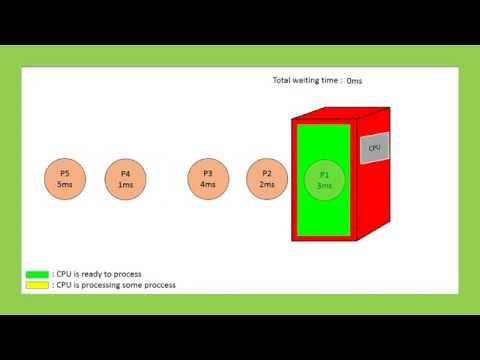

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('w9Uld56AsKE', width=800, height=300, start = 88)

In [6]:
# Q1.
from File import *
import random as rd
def creer_file_processus():
    while True :
        N=int(input("saisir nombre de processus : "))
        if N>0:
            break
    f=creer_file()
    for i in range(1, N+1):
        x=rd.randint(10, 100) # temps de proc en ms
        enfiler(f,('P'+str(i),x))
    return(f)

In [7]:
creer_file_processus()

saisir nombre de processus : 7


[('P1', 81),
 ('P2', 44),
 ('P3', 67),
 ('P4', 76),
 ('P5', 47),
 ('P6', 16),
 ('P7', 38)]

In [8]:
def tourniquet():
    f=creer_file_processus()
    print("file initiale : ", f)
    while True :
        q=int(input("saisir le quantum alloué par processus : "))
        if q>0:
            break
    temps_attente = 0
    while not(est_vide(f)):
        t=tete(f)
        if t[1]>q:
            enfiler(f,(t[0],t[1]-q))
            temps_attente+=q
        else:
            temps_attente+=t[1]
        defiler(f)
        print(f)
    print("Temps total d'attete est {} ms".format(temps_attente))

In [9]:
tourniquet()

saisir nombre de processus : 6
file initiale :  [('P1', 52), ('P2', 58), ('P3', 66), ('P4', 69), ('P5', 62), ('P6', 16)]
saisir le quantum alloué par processus : 20
[('P2', 58), ('P3', 66), ('P4', 69), ('P5', 62), ('P6', 16), ('P1', 32)]
[('P3', 66), ('P4', 69), ('P5', 62), ('P6', 16), ('P1', 32), ('P2', 38)]
[('P4', 69), ('P5', 62), ('P6', 16), ('P1', 32), ('P2', 38), ('P3', 46)]
[('P5', 62), ('P6', 16), ('P1', 32), ('P2', 38), ('P3', 46), ('P4', 49)]
[('P6', 16), ('P1', 32), ('P2', 38), ('P3', 46), ('P4', 49), ('P5', 42)]
[('P1', 32), ('P2', 38), ('P3', 46), ('P4', 49), ('P5', 42)]
[('P2', 38), ('P3', 46), ('P4', 49), ('P5', 42), ('P1', 12)]
[('P3', 46), ('P4', 49), ('P5', 42), ('P1', 12), ('P2', 18)]
[('P4', 49), ('P5', 42), ('P1', 12), ('P2', 18), ('P3', 26)]
[('P5', 42), ('P1', 12), ('P2', 18), ('P3', 26), ('P4', 29)]
[('P1', 12), ('P2', 18), ('P3', 26), ('P4', 29), ('P5', 22)]
[('P2', 18), ('P3', 26), ('P4', 29), ('P5', 22)]
[('P3', 26), ('P4', 29), ('P5', 22)]
[('P4', 29), ('P5'